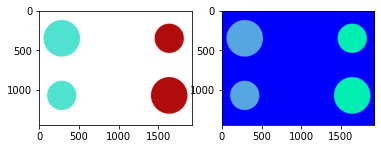

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('img/circulo.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.subplot(1,2,2)
plt.imshow(imgHSV)
plt.show()

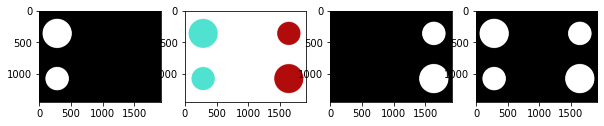

In [2]:
# RGB AQUAMARINE 79,226,208
# RGB VERMELHO 177,11,11
# RGB FUNDO 255,255,255

# HSV AQUAMARINE 173,65,89
# HSV VERMELHO 0,94,69
# HSV FUNDO 0,0,100

# definindo range de cor aquamarine para openCV
caquamarine_min = np.array([86,64,88])
caquamarine_max = np.array([87,255,255])
maquamarine = cv2.inRange(imgHSV, caquamarine_min, caquamarine_max)

# definindo range de cor vermelho para openCV
cvermelho_min = np.array([0,93,68])
cvermelho_max = np.array([10,255,255])
mvermelho = cv2.inRange(imgHSV, cvermelho_min, cvermelho_max)

plt.figure(figsize = (10,10))
plt.subplot(1,4,2)
plt.imshow(imgRGB)
plt.subplot(1,4,1)
plt.imshow(maquamarine, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1,4,3)
plt.imshow(mvermelho, cmap="Greys_r", vmin=0, vmax=255)

# definindo range de cores para openCV
mask_min = np.array([0,64,68])
mask_max = np.array([87,255,255])
mask = cv2.inRange(imgHSV, mask_min, mask_max)

plt.subplot(1,4,4)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

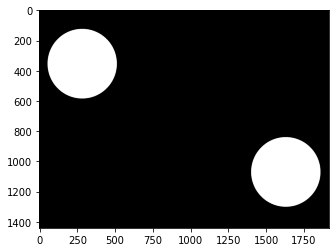

In [3]:
# segmentar apenas os circulos maiores com crop

altura = mask.shape[0]
largura = mask.shape[1]

black = maquamarine[:int(altura/2),int(largura/2):]
mask_lg = mask.copy()
mask_lg[:int(altura/2),int(largura/2):] = black
mask_lg[int(altura/2):,:int(largura/2)] = black

plt.imshow(mask_lg, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

area do circulo aquamarine: 164606
centro de massa do circulo aquamarine na posição: 285x e 354y

area do circulo vermelho: 164694
centro de massa do circulo vermelho na posição: 1633x e 1069y



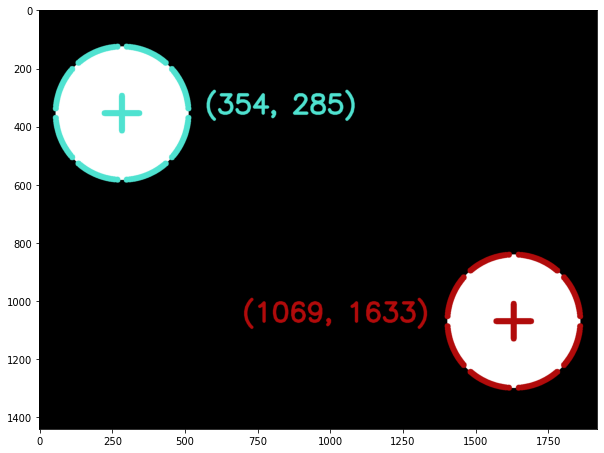

In [9]:
# criar contorno de elementos reconhecidos na mascara

caquamarine = (79,226,208)
cvermelho = (177,11,11)

contornos, _ = cv2.findContours(mask_lg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_lg_rgb = cv2.cvtColor(mask_lg, cv2.COLOR_GRAY2RGB) 
contornos_rgb = mask_lg_rgb.copy()
cv2.drawContours(contornos_rgb, contornos[1], -1, caquamarine, 20);
cv2.drawContours(contornos_rgb, contornos[0], -1, cvermelho, 20);


# calcular cordendas do centro de massa
contorno_aquamarine = contornos[1]
area_aquamarine = cv2.contourArea(contorno_aquamarine)
momentos_aquamarine = cv2.moments(contorno_aquamarine)
ax = int(momentos_aquamarine['m10']/momentos_aquamarine['m00'])
ay = int(momentos_aquamarine['m01']/momentos_aquamarine['m00'])

contorno_vermelho = contornos[0]
area_vermelho = cv2.contourArea(contorno_vermelho)
momentos_vermelho = cv2.moments(contorno_vermelho)
vx = int(momentos_vermelho['m10']/momentos_vermelho['m00'])
vy = int(momentos_vermelho['m01']/momentos_vermelho['m00'])

print(f"area do circulo aquamarine: {int(area_aquamarine)}")
print(f"centro de massa do circulo aquamarine na posição: {ax}x e {ay}y")
print()
print(f"area do circulo vermelho: {int(area_vermelho)}")
print(f"centro de massa do circulo vermelho na posição: {vx}x e {vy}y")
print()


# printar centro de massa e valor na mascara
font = cv2.FONT_HERSHEY_SIMPLEX
size = 60

cv2.line(contornos_rgb,(ax - size,ay),(ax + size,ay),caquamarine,20)
cv2.line(contornos_rgb,(ax,ay - size),(ax, ay + size),caquamarine,20)

cv2.line(contornos_rgb,(vx - size,vy),(vx + size,vy),cvermelho,20)
cv2.line(contornos_rgb,(vx,vy - size),(vx, vy + size),cvermelho,20)

taquamarine = ay , ax
paquamarine = (ax*2,ay)

tvermelho = vy , vx
pvermelho = (int(vx - vx/1.75),vy)

cv2.putText(contornos_rgb, str(taquamarine), paquamarine, font, 3, caquamarine, 10, cv2.LINE_AA)
cv2.putText(contornos_rgb, str(tvermelho), pvermelho, font, 3, cvermelho, 10, cv2.LINE_AA)

plt.figure(figsize = (10,10))
plt.imshow(contornos_rgb);

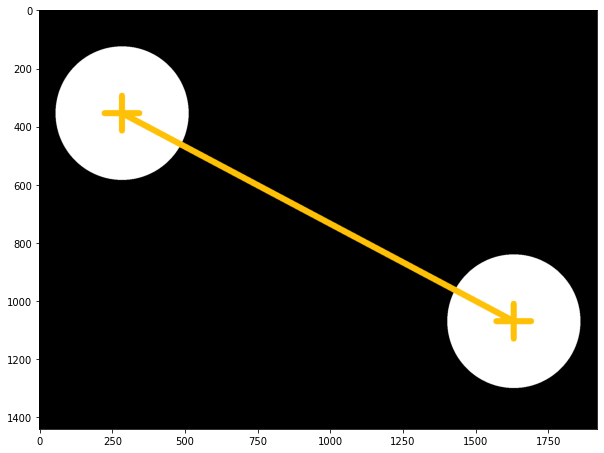

In [7]:
# tracar uma reta entre os dois centros dos circulos

lineangle_rgb = mask_lg_rgb.copy()

cline = (255,193,7)

cv2.line(lineangle_rgb,(ax - size,ay),(ax + size,ay),cline,20)
cv2.line(lineangle_rgb,(ax,ay - size),(ax, ay + size),cline,20)

cv2.line(lineangle_rgb,(vx - size,vy),(vx + size,vy),cline,20)
cv2.line(lineangle_rgb,(vx,vy - size),(vx, vy + size),cline,20)

cv2.line(lineangle_rgb,(ax,ay),(vx,vy),cline,20)

plt.figure(figsize = (10,10))
plt.imshow(lineangle_rgb);

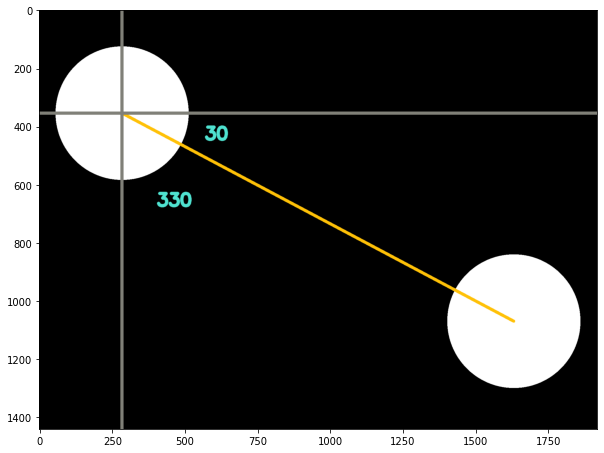

In [92]:
import math

cartesiano = mask_lg_rgb.copy()
altura = cartesiano.shape[0]
largura = cartesiano.shape[1]

ccartesiano = (128,128,120)
cv2.line(cartesiano,(ax,ay),(vx,vy),cline,10)
cv2.line(cartesiano,(0,ay),(largura,ay),ccartesiano,10)
cv2.line(cartesiano,(ax,0),(ax,altura),ccartesiano,10)

cat_oposto = (-vy)-(-ay)
cat_adjacente = vx - ax
rad = cat_oposto / cat_adjacente

graus = round(math.degrees(rad))
agudo = 0 - graus
concavo = graus + 360

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(cartesiano, str(agudo), (ax*2,ay+90), font, 2, caquamarine, 10, cv2.LINE_AA)
cv2.putText(cartesiano, str(concavo), (ax+120,int(ay*1.9)), font, 2, caquamarine, 10, cv2.LINE_AA)

plt.figure(figsize = (10,10))
plt.imshow(cartesiano);
